<a href="https://colab.research.google.com/github/Nallasailaja/FMML-/blob/main/Mod_9_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

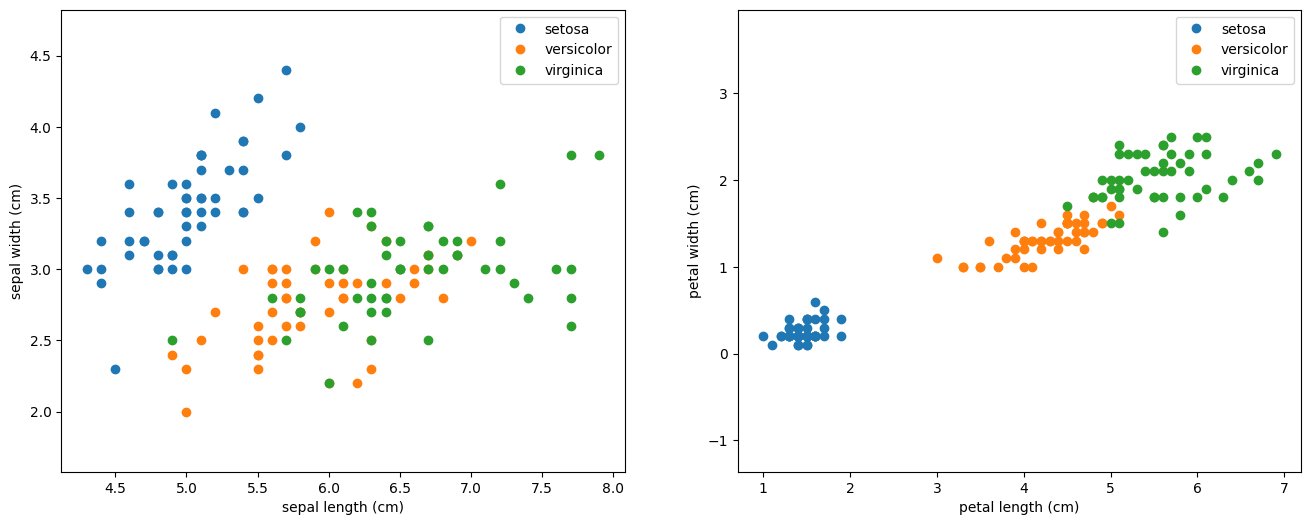

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 394.42it/s]


# Plot training progress

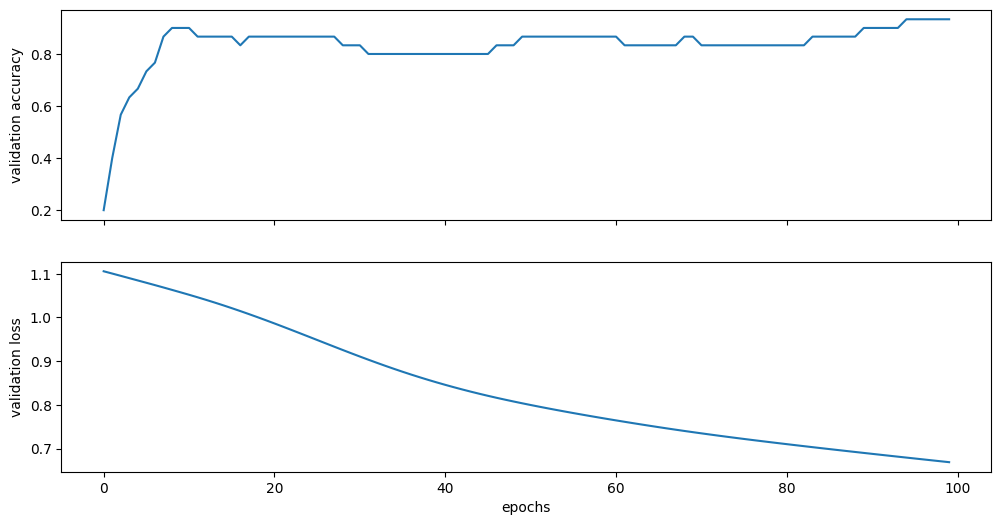

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
1. Try changing the number of hidden layers

In a neural network, hidden layers play a crucial role in learning complex patterns. By adjusting the number of hidden layers, you can control the model's ability to capture relationships in the data.

Impact of More Hidden Layers:

Advantages:

Can model more complex functions.

Can capture hierarchical representations (especially useful in images, texts).


Disadvantages:

More prone to overfitting (especially with limited data).

Longer training times.

Requires careful tuning of learning rate, regularization, etc.



Example: Here's how you can change the architecture by adding more hidden layers using Keras:

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(input_dim,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))  # Added an extra hidden layer
model.add(Dense(output_dim, activation='softmax'))  # Output layer

Explanation:

128, 64, and 32 are the number of neurons in each hidden layer.

relu is used as the activation function for hidden layers to introduce non-linearity.

softmax is used in the output layer for multi-class classification.


You can compare this model's performance (accuracy, loss) with a simpler one to see if deeper architecture helps. It's common to start simple and gradually increase complexity based on validation results.


2.   Try changing the number of neurons in the hidden layer.
2. Try changing the number of neurons in the hidden layer

The number of neurons (also called units) in a hidden layer determines the capacity of the network to learn from data. Increasing or decreasing neurons affects the model's ability to generalize.

Impact of Changing Neurons:

More neurons:

Higher capacity to learn complex patterns.

May lead to overfitting if not regularized.


Fewer neurons:

Faster training and less risk of overfitting.

Might underfit if the model is too simple.



Example: Original (e.g., 64 neurons):

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model.add(Dense(output_dim, activation='softmax'))

Modified (e.g., increased to 128 neurons):

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(input_dim,)))  # Increased neurons
model.add(Dense(output_dim, activation='softmax'))

Or decreased:

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(input_dim,)))  # Decreased neurons
model.add(Dense(output_dim, activation='softmax'))

Tip: Try several configurations like 32, 64, 128, 256 neurons and observe training/validation accuracy to choose the best setup.


3.   Try using a different activation function.
3. Try using a different activation function

Activation functions introduce non-linearity, which allows neural networks to learn complex patterns. The most common ones are ReLU, Sigmoid, and Tanh.

Example: Using tanh instead of relu

model = Sequential()
model.add(Dense(64, activation='tanh', input_shape=(input_dim,)))  # Changed to 'tanh'
model.add(Dense(output_dim, activation='softmax'))

Example: Using sigmoid

model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(input_dim,)))  # Changed to 'sigmoid'
model.add(Dense(output_dim, activation='softmax'))


---

Can you observe any changes?

Yes, changing the activation function can affect:

Training speed: ReLU trains faster than sigmoid or tanh.

Accuracy: Some functions might perform better depending on the dataset.

Gradient behavior:

Sigmoid and tanh can cause vanishing gradients in deep networks.

ReLU avoids this but can lead to "dead neurons."



Recommendation:

Use ReLU for hidden layers in most cases.

Try tanh or sigmoid for experimentation or when your data benefits from bounded outputs.


Track changes in accuracy, loss, and convergence speed during training to compare the performance.





Can you observe any changes?